# **Decision Tree: Predicting Loan Approval**

## Scenario
You are a data scientist at a financial institution tasked with developing a model to predict loan approval status. The insights derived from this model will help streamline the loan application process, ensuring faster and more accurate decisions.

## Dataset Overview
The dataset includes the following columns:
- `Gender`: Gender of the applicant (`1` for male, `0` for female).
- `Married`: Marital status (`1` for married, `0` for unmarried).
- `Dependents`: Number of dependents the applicant has.
- `Education`: Educational status (`1` for graduate, `0` for not graduate).
- `Self_Employed`: Employment status (`1` for self-employed, `0` for not self-employed).
- `ApplicantIncome`: Income of the primary applicant.
- `CoapplicantIncome`: Income of the co-applicant.
- `LoanAmount`: Loan amount requested (in thousands).
- `Loan_Amount_Term`: Term of the loan (in days).
- `Credit_History`: Credit history of the applicant (`1` for clear, `0` for poor history).
- `Loan_Status`: Target variable; loan approval status (`1` for approved, `0` for not approved).

## Your Challenge
Build a **Decision Tree model** to predict whether a loan application will be approved (`Loan_Status`).

## Why Decision Trees?
Decision Trees are well-suited for this scenario because:
1. They handle both categorical and numerical data, making them versatile for datasets with mixed data types.
2. They provide a clear visual representation of the decision-making process, which is easy to interpret and explain to stakeholders.
3. They effectively capture interactions between features, making them ideal for datasets with complex relationships.

## Identifying Input and Target Variables
- **Input Variables**: `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`.
- **Target Variable**: `Loan_Status`.



## Step 1: Import Libraries

In [4]:
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model and visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

## Step 2: Load the Dataset

In [6]:
# Load the dataset
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001003       1        1           1          1              0   
1  LP001005       1        1           0          1              1   
2  LP001006       1        1           0          0              0   
3  LP001008       1        0           0          1              0   
4  LP001013       1        1           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       12800               360   
1             3000                0.0        6600               360   
2             2583             2358.0       12000               360   
3             6000                0.0       14100               360   
4             2333             1516.0        9500               360   

   Credit_History  Loan_Status  
0               1            0  
1               1            1  
2               1            1  
3               1   

## Step 3: Data Preparation

In [8]:
# Separate input features and target variable
X = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] # Input Variables
y = data['Loan_Status'] # Target Variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 4: Train the Model

[Text(0.3958333333333333, 0.9166666666666666, 'Credit_History <= 0.5\ngini = 0.398\nsamples = 215\nvalue = [59, 156]\nclass = 1'),
 Text(0.3541666666666667, 0.75, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = 0'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.4375, 0.75, 'CoapplicantIncome <= 768.0\ngini = 0.277\nsamples = 187\nvalue = [31, 156]\nclass = 1'),
 Text(0.41666666666666663, 0.8333333333333333, '  False'),
 Text(0.20833333333333334, 0.5833333333333334, 'Loan_Amount_Term <= 420.0\ngini = 0.367\nsamples = 91\nvalue = [22, 69]\nclass = 1'),
 Text(0.16666666666666666, 0.4166666666666667, 'LoanAmount <= 9550.0\ngini = 0.339\nsamples = 88\nvalue = [19, 69]\nclass = 1'),
 Text(0.08333333333333333, 0.25, 'LoanAmount <= 7800.0\ngini = 0.45\nsamples = 38\nvalue = [13, 25]\nclass = 1'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = 1'),
 Text(0.125, 0.08333333333333333, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass

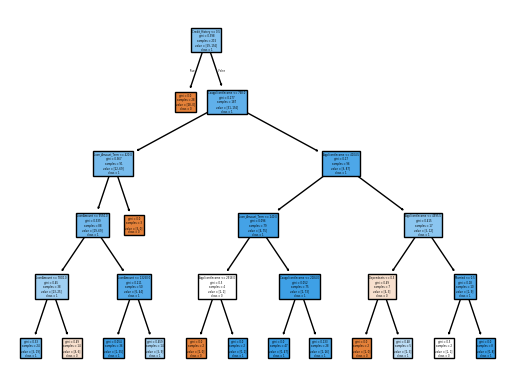

In [10]:
# Initialise and train the decision tree model
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Visualise the decision tree
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)

## Step 5: Evaluate the Model

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.74
Confusion Matrix:
 [[15 15]
 [ 9 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        30
           1       0.78      0.86      0.82        63

    accuracy                           0.74        93
   macro avg       0.70      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93



### Result Interpretation 
The model has an accuracy of 0.74, which means it correctly predicts whether a loan should be approved or not in 74% of the cases.

## Step 6: Make Predictions with New Data

In [15]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Gender': [1, 0],
    'Married': [1, 0],
    'Dependents': [1, 0],
    'Education': [0, 1],
    'Self_Employed': [1, 0],
    'ApplicantIncome': [10000, 8000],
    'CoapplicantIncome': [2000, 8],
    'LoanAmount': [14000, 3000],
    'Loan_Amount_Term': [360, 120],
    'Credit_History':[1,0],
})
new_data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,1,0,1,10000,2000,14000,360,1
1,0,0,0,1,0,8000,8,3000,120,0


- **Individual 1 (Row 1):**  
  - **Gender:** Male (1)  
  - **Married:** Yes (1)  
  - **Dependents:** 1 dependent  
  - **Education:** Not Graduate (0)  
  - **Self Employed:** Yes (1)  
  - **Applicant Income:** 10,000  
  - **Coapplicant Income:** 2,000  
  - **Loan Amount:** 14,000  
  - **Loan Amount Term:** 360 months  
  - **Credit History:** Clear (1)  


- **Individual 2 (Row 2):**  
  - **Gender:** Female (0)  
  - **Married:** No (0)  
  - **Dependents:** No dependents (0)  
  - **Education:** Graduate (1)  
  - **Self Employed:** No (0)  
  - **Applicant Income:** 8,000  
  - **Coapplicant Income:** 8  
  - **Loan Amount:** 3,000  
  - **Loan Amount Term:** 120 months  
  - **Credit History:** Poor (0)  


In [18]:
# Predict the loan status for new data
predicted_classes = model.predict(new_data)
print("Predicted Classes:", predicted_classes)

Predicted Classes: [1 0]


## What's Next?

Up next, we will learn about Random Forest, an advanced ensemble algorithm built on Decision Trees. It combines multiple decision trees to improve accuracy and robustness, making it a powerful tool for both classification and regression tasks. Stay tuned!